<a href="https://colab.research.google.com/github/JaimeTorio/UFV_Visualizacion/blob/main/Ejercicios%20de%20clase/%20Clase2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase 18/10/2024**

In [65]:
import pandas as pd
df = pd.read_csv('datos_ejercicio_ventas.csv')
print(df.head())


         COUNTRY        SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0       Portugal     Lipton (L3)  2023     12  AI_forecast  AI_P02F   
1  Great Britain     Lipton (L3)  2023     12  AI_forecast  AI_P10F   
2          Spain  Pepsi Max (L3)  2023     12  AI_forecast  AI_P09F   
3  Great Britain        7up (L3)  2024     12  AI_forecast  AI_P10F   
4        Hungary     Lipton (L3)  2023      9  AI_forecast  AI_P03F   

   FORECAST_YEAR         AMOUNT  
0         2023.0  754356.237194  
1         2023.0  560030.558029  
2         2023.0   88501.980847  
3         2023.0  363224.511516  
4         2023.0  396176.120491  


In [66]:
# 1. Tamaño del Dataset
dataset_size = df.shape
print(f'Tamaño del dataset: {dataset_size}')

Tamaño del dataset: (18666, 8)


In [67]:
# 2. Número de Actuals y Forecast
actuals_forecast_count = df['SCENARIO'].value_counts()
print(f'Número de Actuals y Forecast: \n{actuals_forecast_count}')

Número de Actuals y Forecast: 
SCENARIO
AI_forecast    17766
actual           900
Name: count, dtype: int64


In [68]:
# Crear una columna de fecha predicha usando solo el año de predicción
df['PREDICTED_DATE'] = df['FORECAST_YEAR']

# Crear una columna de fecha actual combinando año y mes
df['ACTUAL_DATE'] = df['YEAR'] + (df['MONTH'] - 1) / 12

# Calcular la diferencia (HORIZON) entre la fecha predicha y la fecha actual
df['HORIZON'] = df['ACTUAL_DATE'] - df['PREDICTED_DATE']

# Convertir el horizonte a meses
df['HORIZON_MONTHS'] = df['HORIZON'] * 12

# Filtrar solo los registros con predicciones (AI_forecast)
horizonte_forecast = df[df['SCENARIO'] == 'AI_forecast'][['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'HORIZON_MONTHS']]

# Mostrar los resultados de los horizontes en meses
horizonte_forecast.head()


,COUNTRY,SUBBRAND,YEAR,MONTH,HORIZON_MONTHS
0,Portugal,Lipton (L3),2023,12,11.0
1,Great Britain,Lipton (L3),2023,12,11.0
2,Spain,Pepsi Max (L3),2023,12,11.0
3,Great Britain,7up (L3),2024,12,23.0
4,Hungary,Lipton (L3),2023,9,8.0


In [69]:
# 4. Número de países y productos
num_countries = df['COUNTRY'].nunique()
num_products = df['SUBBRAND'].nunique()
print(f'Número de países: {num_countries}')
print(f'Número de productos: {num_products}')

Número de países: 9
Número de productos: 6


In [70]:
# 5. Histórico de datos (Actuals y Forecast)
historical_data_range = df[['YEAR', 'MONTH']].drop_duplicates().sort_values(by=['YEAR', 'MONTH'])
print('Histórico de datos:')
print(historical_data_range.head())

Histórico de datos:
     YEAR  MONTH
34   2023      1
397  2023      2
118  2023      3
9    2023      4
57   2023      5


In [71]:
# 6. Forecasts distintos
distinct_forecasts = df['FORECAST'].nunique()
print(f'Forecasts distintos: {distinct_forecasts}')

Forecasts distintos: 12


1. **Tamaño del Dataset**: 18,666 filas y 8 columnas.
2. **Número de Actuals y Forecast**:
   - AI_forecast: 17,766 registros.
   - Actuals: 900 registros.
3.
- Portugal (Lipton): Predicción hecha 11 meses antes de diciembre de 2023.
- Great Britain (Lipton): Predicción hecha 11 meses antes de diciembre de 2023.
- España (Pepsi Max): Predicción hecha 11 meses antes de diciembre de 2023.
- Great Britain (7up): Predicción hecha 23 meses antes de diciembre de 2024.
- Hungary (Lipton): Predicción hecha 8 meses antes de septiembre de 2023.

4. **Número de países**: 9 países.
5. **Número de productos**: 6 productos (submarcas).
6. **Histórico de datos (Actuals y Forecast)**: El rango de datos históricos comienza en enero de 2023.
7. **Forecasts distintos**: Hay 12 tipos de forecast distintos.


# **Enunciado**

1. Como se distribuyen las ventas realizadas en:
* Cada país (Graficos de  Solo Actuals + Grafico con AI_Forecast incluido)
* Cada mes y año (Graficos de  Solo Actuals + Grafico con AI_Forecast incluido)
* Cada marca (Graficos de  Solo Actuals + Grafico con AI_Forecast incluido)
2. Cual es la tendencia y estacionalidad de:
* Todas las ventas del país con menos ventas
* La marca con más ventas
3. Cuales son las predicciones hechas en España y como de
buenas son.


In [72]:
import pandas as pd
data = pd.read_csv('datos_ejercicio_ventas.csv')
print(df.head())

         COUNTRY        SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0       Portugal     Lipton (L3)  2023     12  AI_forecast  AI_P02F   
1  Great Britain     Lipton (L3)  2023     12  AI_forecast  AI_P10F   
2          Spain  Pepsi Max (L3)  2023     12  AI_forecast  AI_P09F   
3  Great Britain        7up (L3)  2024     12  AI_forecast  AI_P10F   
4        Hungary     Lipton (L3)  2023      9  AI_forecast  AI_P03F   

   FORECAST_YEAR         AMOUNT  PREDICTED_DATE  ACTUAL_DATE   HORIZON  \
0         2023.0  754356.237194          2023.0  2023.916667  0.916667   
1         2023.0  560030.558029          2023.0  2023.916667  0.916667   
2         2023.0   88501.980847          2023.0  2023.916667  0.916667   
3         2023.0  363224.511516          2023.0  2024.916667  1.916667   
4         2023.0  396176.120491          2023.0  2023.666667  0.666667   

   HORIZON_MONTHS  
0            11.0  
1            11.0  
2            11.0  
3            23.0  
4             8.0  


1.1. Como se distribuyen las ventas realizadas en cada país

In [73]:
# Filtrar datos para incluir solo ventas actuales, excluyendo cualquier escenario de pronóstico
actual_sales_data = data[data['SCENARIO'] != 'AI_forecast']

# Agregar ventas por país
sales_by_country = actual_sales_data.groupby('COUNTRY')['AMOUNT'].sum().reset_index()
sales_by_country = sales_by_country.sort_values(by='AMOUNT', ascending=False)

# Graficando la distribución de ventas por país
import plotly.express as px

green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c", "#478c80", "#649e94", "#8db9b2", "#b7d4d0"]

fig = px.bar(sales_by_country, x='COUNTRY', y='AMOUNT', title='Distribución de Ventas por País (Solo Actuals)',
             labels={'COUNTRY': 'País', 'AMOUNT': 'Ventas (en cantidad)'},
             color='COUNTRY', color_discrete_sequence=green_palette)
fig.show()

Esta gráfica muestra la distribución de ventas totales por país, utilizando solo datos de ventas actuales podemos observar que Great Britain tiene el mayor volumen de ventas (significativamente más alto que otros países) mientras que Spain tiene el volumen más bajo en esta comparación. Los demás países tienen ventas intermedia, podemos destacar tambien Netherlands y Denmark en el segundo y tercer lugar, respectivamente.

In [74]:
import plotly.express as px
sales_by_country = data.groupby('COUNTRY')['AMOUNT'].sum().reset_index()
sales_by_country = sales_by_country.sort_values(by='AMOUNT', ascending=False)

green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c", "#478c80", "#649e94", "#8db9b2", "#b7d4d0"]

fig = px.bar(sales_by_country, x='COUNTRY', y='AMOUNT', title='Distribución de Ventas por País (AI_Forecast incluido)',
             labels={'COUNTRY': 'País', 'AMOUNT': 'Ventas (en cantidad)'},
             color='COUNTRY', color_discrete_sequence=green_palette)
fig.show()


El mayor volumen de ventas proviene de Reino Unido, con una diferencia notable respecto a los demás países. Le siguen Dinamarca y Noruega, aunque con cantidades considerablemente menores. Los países con menor volumen de ventas incluyen España, Portugal e Italia.

1.2.Como se distribuyen las ventas realizadas en cada mes y año

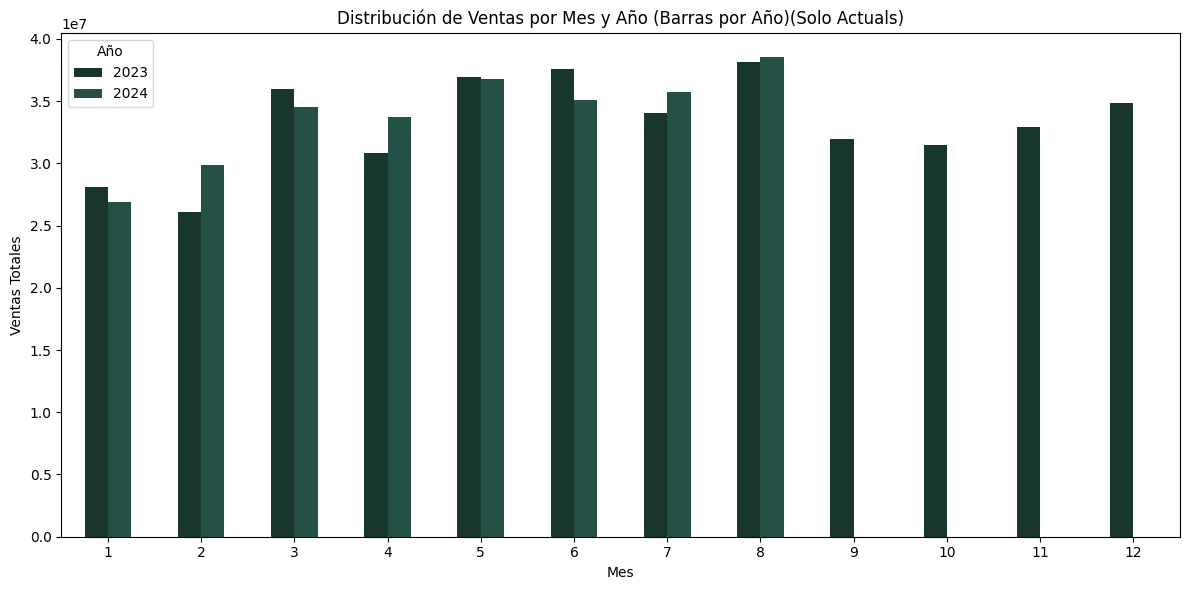

In [75]:
import matplotlib.pyplot as plt

# Agrupar y sumar datos por mes y año, incluyendo solo datos de ventas actuales (solo Actuals)
actual_sales_data_grouped = actual_sales_data.groupby(['MONTH', 'YEAR'])['AMOUNT'].sum().unstack()

# Definimos la paleta de color
green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c", "#478c80", "#649e94", "#8db9b2", "#b7d4d0"]

# Graficamos la distribución de ventas por mes y año
fig, ax = plt.subplots(figsize=(12, 6))
actual_sales_data_grouped.plot(kind='bar', ax=ax, color=green_palette[:actual_sales_data_grouped.shape[1]])

ax.set_title("Distribución de Ventas por Mes y Año (Barras por Año)(Solo Actuals)")
ax.set_xlabel("Mes")
ax.set_ylabel("Ventas Totales")
ax.legend(title="Año")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

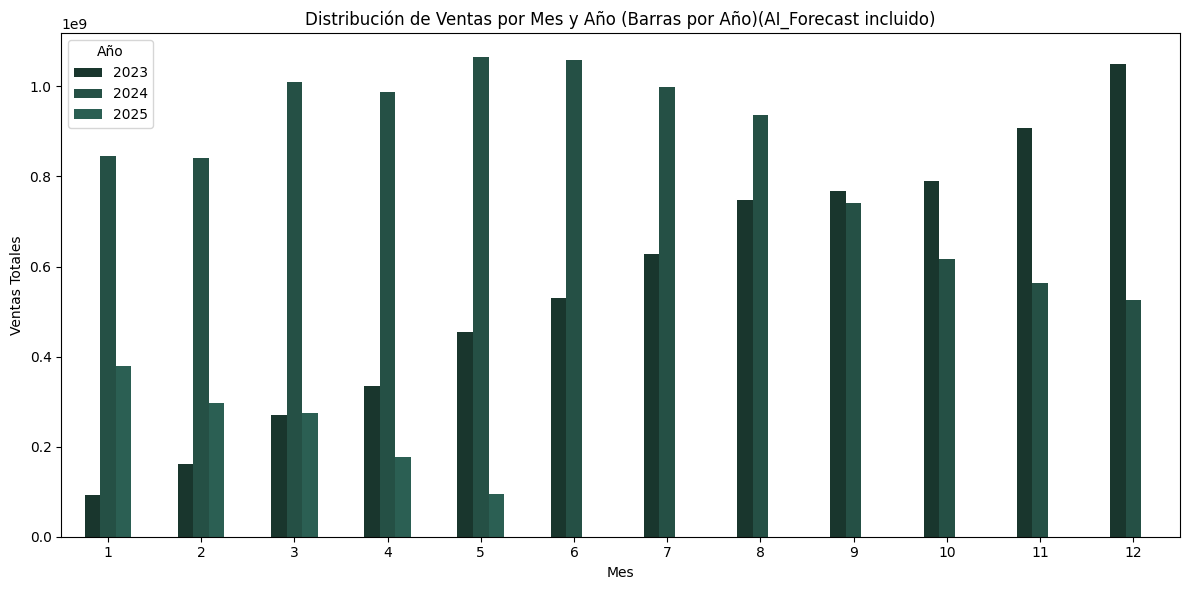

In [76]:
import matplotlib.pyplot as plt

df_grouped = data.groupby(['MONTH', 'YEAR'])['AMOUNT'].sum().unstack()

# Definimos la paleta de colores
green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c", "#478c80", "#649e94", "#8db9b2", "#b7d4d0"]

fig, ax = plt.subplots(figsize=(12, 6))
df_grouped.plot(kind='bar', ax=ax, color=green_palette[:df_grouped.shape[1]])

ax.set_title("Distribución de Ventas por Mes y Año (Barras por Año)(AI_Forecast incluido)")
ax.set_xlabel("Mes")
ax.set_ylabel("Ventas Totales")
ax.legend(title="Año")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


1.3.Como se distribuyen las ventas realizadas en cada marca

In [77]:
import plotly.express as px
brand_sales_actual = actual_sales_data.groupby('SUBBRAND')['AMOUNT'].sum().reset_index().sort_values(by='AMOUNT', ascending=False)
fig_brand_sales = px.bar(
    brand_sales_actual,
    x='SUBBRAND',
    y='AMOUNT',
    color='SUBBRAND',
    title='Distribución de Ventas Totales por Marca (Ordenado de Mayor a Menor)(Solo Actuals)',
    labels={'AMOUNT': 'Ventas Totales', 'SUBBRAND': 'Marca'},
    color_discrete_sequence=green_palette
)
fig_brand_sales.show()


Se puede observar que Pepsi Max es la marca con las ventas más altas, superando los 400 millones, seguida de Pepsi Regular y Lipton con ventas menores pero aún destacadas. Las demás marcas, como 7up Free, 7up, y Mountain Dew, tienen volúmenes de ventas significativamente menores en comparación.

In [78]:
import pandas as pd
import plotly.express as px

# Definimos la paleta de colores
green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c", "#478c80", "#649e94", "#8db9b2", "#b7d4d0"]

# Agrupamos las ventas totales por marca (SUBBRAND) y calcular la suma de ventas para cada una, luego ordenar de mayor a menor
brand_sales = data.groupby('SUBBRAND')['AMOUNT'].sum().reset_index().sort_values(by='AMOUNT', ascending=False)

# Creamos una gráfica de barras de distribución de ventas por marca, asignando un color distinto a cada marca
fig_brand_sales = px.bar(
    brand_sales,
    x='SUBBRAND',
    y='AMOUNT',
    color='SUBBRAND',  # Cada marca tendrá un color diferente
    title='Distribución de Ventas Totales por Marca (Ordenado de Mayor a Menor)(AI_Forecast incluido)',
    labels={'AMOUNT': 'Ventas Totales', 'SUBBRAND': 'Marca'},
    color_discrete_sequence=green_palette  # Aplicar la paleta de colores personalizada
)

# Mostramos la gráfica
fig_brand_sales.show()

La marca con mayor volumen de ventas es Pepsi Max, que supera considerablemente a las demás, alcanzando más de 12 mil millones en ventas totales. Le sigue Pepsi Regular con una cantidad mucho menor, y luego Lipton. Las marcas con menor volumen de ventas son 7up Free, 7up, y finalmente Mountain Dew, que tiene la cifra más baja.

2. Cual es la tendencia y estacionalidad de:

* Todas las ventas del país con menos ventas

* La marca con más ventas

In [79]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filtramos datos para España
pais = 'Spain'
df_pais = df[df['COUNTRY'] == pais]

# Creamos una columna de fecha combinando el año y el mes
df_pais['DATE'] = pd.to_datetime(df_pais['YEAR'].astype(str) + '-' + df_pais['MONTH'].astype(str) + '-01')

# Ordenamos por fecha y establecerla como índice
df_pais = df_pais.sort_values(by='DATE')
df_pais.set_index('DATE', inplace=True)

# Resumimos las ventas mensuales
ventas_mensuales = df_pais['AMOUNT'].resample('ME').sum()

# Descomponemos la serie temporal
spain_decomposition = seasonal_decompose(ventas_mensuales, model='additive', period=12)

# Definimos paleta de colores
green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c", "#478c80", "#649e94", "#8db9b2", "#b7d4d0"]

# Creamos gráfico para España
fig_spain = make_subplots(rows=4, cols=1, vertical_spacing=0.1, subplot_titles=("Ventas Observadas", "Tendencia", "Estacionalidad", "Residuos"))

# Gráficos de cada componente
fig_spain.add_trace(go.Scatter(x=spain_decomposition.observed.index, y=spain_decomposition.observed, mode='lines', name='Ventas Observadas', line=dict(color=green_palette[0])), row=1, col=1)
fig_spain.add_trace(go.Scatter(x=spain_decomposition.trend.index, y=spain_decomposition.trend, mode='lines', name='Tendencia', line=dict(color=green_palette[2])), row=2, col=1)
fig_spain.add_trace(go.Scatter(x=spain_decomposition.seasonal.index, y=spain_decomposition.seasonal, mode='lines', name='Estacionalidad', line=dict(color=green_palette[4])), row=3, col=1)
fig_spain.add_trace(go.Scatter(x=spain_decomposition.resid.index, y=spain_decomposition.resid, mode='lines', name='Residuos', line=dict(color=green_palette[6])), row=4, col=1)

fig_spain.update_layout(title=f"Tendencia y Estacionalidad de Ventas en {pais}", height=800, showlegend=False)

# Mostramos el gráfico para España
fig_spain.show()


<ipython-input-79-f0e155163a94>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Ventas Observadas:** existe un patrón general de crecimiento desde principios de 2023 hasta un pico en 2024, seguido de una leve disminución en 2025.

**Tendencia:** Muestra la tendencia a largo plazo en las ventas, que sube de manera constante hasta alcanzar un máximo en 2024, para luego empezar a disminuir lentamente hacia 2025.

**Estacionalidad:** Indica fluctuaciones periódicas en las ventas.

**Residuos:** Representa las variaciones aleatorias o irregulares que no se explican por la tendencia ni la estacionalidad.

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filtra datos para "Pepsi Max (L3)"
marca = 'Pepsi Max (L3)'
df_marca = df[df['SUBBRAND'] == marca]

# Creamos una columna de fecha combinando el año y el mes
df_marca['DATE'] = pd.to_datetime(df_marca['YEAR'].astype(str) + '-' + df_marca['MONTH'].astype(str) + '-01')

# Ordenamos por fecha y establecerla como índice
df_marca = df_marca.sort_values(by='DATE')
df_marca.set_index('DATE', inplace=True)

# Resumimos las ventas mensuales
ventas_mensuales_marca = df_marca['AMOUNT'].resample('M').sum()

# Descomponemos la serie temporal
pepsi_max_decomposition = seasonal_decompose(ventas_mensuales_marca, model='additive', period=12)

# Definimos la paleta de colores
green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c", "#478c80", "#649e94", "#8db9b2", "#b7d4d0"]

# Creamos gráfico para Pepsi Max
fig_pepsi = make_subplots(rows=4, cols=1, vertical_spacing=0.1, subplot_titles=("Ventas Observadas", "Tendencia", "Estacionalidad", "Residuos"))

# Gráficos de cada componente
fig_pepsi.add_trace(go.Scatter(x=pepsi_max_decomposition.observed.index, y=pepsi_max_decomposition.observed, mode='lines', name='Ventas Observadas', line=dict(color=green_palette[1])), row=1, col=1)
fig_pepsi.add_trace(go.Scatter(x=pepsi_max_decomposition.trend.index, y=pepsi_max_decomposition.trend, mode='lines', name='Tendencia', line=dict(color=green_palette[3])), row=2, col=1)
fig_pepsi.add_trace(go.Scatter(x=pepsi_max_decomposition.seasonal.index, y=pepsi_max_decomposition.seasonal, mode='lines', name='Estacionalidad', line=dict(color=green_palette[5])), row=3, col=1)
fig_pepsi.add_trace(go.Scatter(x=pepsi_max_decomposition.resid.index, y=pepsi_max_decomposition.resid, mode='lines', name='Residuos', line=dict(color=green_palette[7])), row=4, col=1)

# Configuramos el diseño del gráfico
fig_pepsi.update_layout(
    title="Tendencia y Estacionalidad de Ventas de Pepsi Max (L3)",
    height=800,
    showlegend=False
)

# Configuración de etiquetas en el eje x y eje y
fig_pepsi.update_yaxes(title_text="Ventas Observadas", row=1, col=1)
fig_pepsi.update_yaxes(title_text="Tendencia", row=2, col=1)
fig_pepsi.update_yaxes(title_text="Estacionalidad", row=3, col=1)
fig_pepsi.update_yaxes(title_text="Residuos", row=4, col=1)
fig_pepsi.update_xaxes(title_text="Fecha", row=4, col=1)

# Mostramos el gráfico interactivo
fig_pepsi.show()


<ipython-input-80-c51697297ce3>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-c51697297ce3>:17: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



**Ventas Observadas:** Se observa un crecimiento constante desde principios de 2023 hasta un pico en 2024, seguido de una leve disminución hacia 2025.

**Tendencia:** aumenta de forma progresiva hasta alcanzar su punto máximo a mediados de 2024, y luego comienza a disminuir.

**Estacionalidad:** indica que las ventas de Pepsi Max experimentan fluctuaciones regulares en determinados periodos del año.

**Residuos:** se observan picos y caídas ocasionales que podrían estar vinculados a eventos o factores no recurrentes.

3. Cuales son las predicciones hechas en España y como de buenas son.

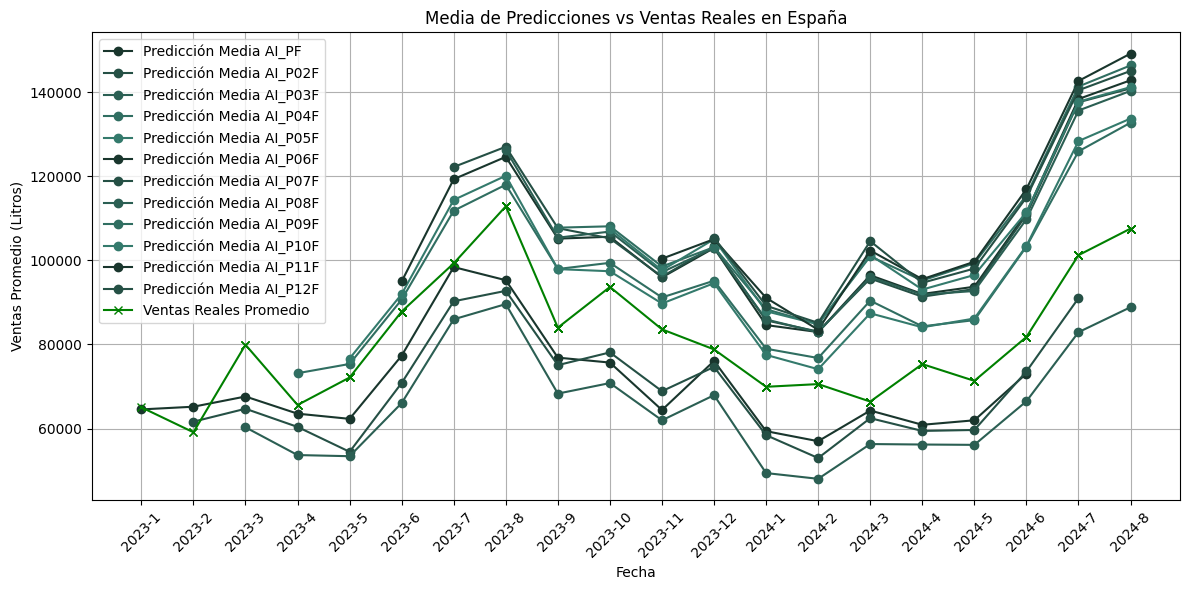

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir la paleta de colores y extenderla si es necesario
green_palette = ["#19362d", "#255045", "#2b5f53", "#306e61", "#347a6c"]
num_forecasts = len(data['FORECAST'].unique())

# Si la cantidad de predicciones es mayor a la paleta, duplicamos la paleta hasta cubrir todos los colores necesarios
if num_forecasts > len(green_palette):
    green_palette *= (num_forecasts // len(green_palette)) + 1
    green_palette = green_palette[:num_forecasts]  # Limitamos a la cantidad exacta necesaria

# Filtrar solo datos de predicciones y ventas reales en España
predicciones_espana = data[(data['COUNTRY'] == 'Spain') & (data['SCENARIO'] == 'AI_forecast')]
ventas_reales_espana = data[(data['COUNTRY'] == 'Spain') & (data['SCENARIO'] == 'actual')]

# Calcular la media de cada FORECAST
media_predicciones = predicciones_espana.groupby(['YEAR', 'MONTH', 'FORECAST'])['AMOUNT'].mean().reset_index()
media_ventas_reales = ventas_reales_espana.groupby(['YEAR', 'MONTH'])['AMOUNT'].mean().reset_index()

# Unir predicciones promedio y ventas reales promedio
comparacion_media = pd.merge(media_predicciones, media_ventas_reales, on=['YEAR', 'MONTH'], suffixes=('_pred', '_real'))

# Graficar media de predicciones vs ventas reales
plt.figure(figsize=(12, 6))
for i, forecast in enumerate(comparacion_media['FORECAST'].unique()):
    datos_forecast = comparacion_media[comparacion_media['FORECAST'] == forecast]
    plt.plot(datos_forecast['YEAR'].astype(str) + '-' + datos_forecast['MONTH'].astype(str),
             datos_forecast['AMOUNT_pred'], label=f'Predicción Media {forecast}', marker='o', color=green_palette[i])

# Graficar ventas reales promedio
plt.plot(comparacion_media['YEAR'].astype(str) + '-' + comparacion_media['MONTH'].astype(str),
         comparacion_media['AMOUNT_real'], label='Ventas Reales Promedio', color='green', marker='x')

# Ajustes de la gráfica
plt.title('Media de Predicciones vs Ventas Reales en España')
plt.xlabel('Fecha')
plt.ylabel('Ventas Promedio (Litros)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


* Las predicciones de ventas siguen un patrón similar entre sí, con picos y caídas a lo largo del tiempo.
* Las ventas reales, aunque tienen algunas similitudes en las tendencias generales, tienden a estar en niveles más bajos que la mayoría de las predicciones.
* Se observan picos de ventas tanto en las predicciones como en los datos reales a mediados de año y nuevamente en el primer trimestre de 2024, seguido de un aumento hacia el final del periodo gráfico.